ניסיון ליצור מודל שיכריע בעזרת רוב
לא מוצלח-

# creating a combined model using model 1,2,3# 

In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [44]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt  # Import matplotlib for data visualisation
import seaborn as sns  # Statistical data visualization
data=pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")


In [45]:
data =data.iloc[:,1:-1]
X = data.drop(['diagnosis'],axis=1)
y = data['diagnosis']

In [46]:
d = pd.get_dummies(y)
y = d.drop('M', axis=1)
y

,B
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [47]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

X_standard = X.apply(zscore)
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.25, random_state=5)

# model1# 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


'The accuracy is 0.98     The f1_score is 0.98'

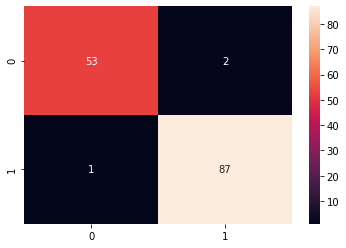

In [48]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

# Define model
svc_model = SVC()

# Fit model
svc_model.fit(X_train, y_train)

#check prediction
y_predict1 = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict1)

sns.heatmap(cm,annot=True,fmt="d")

#accuracy and f1
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_predict1)
f1 = f1_score(y_test, y_predict1, average='macro')
f'The accuracy is %.2f     The f1_score is %.2f' % (acc,f1)

# model 2# 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


'The accuracy is 0.99     The f1_score is 0.99'

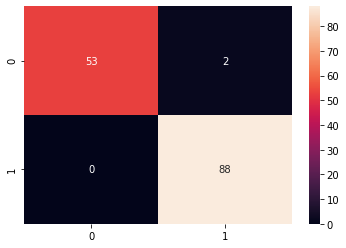

In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Define model. Specify a number for random_state to ensure same results each run
neuro_model = MLPClassifier()

# Fit model
neuro_model.fit(X_train, y_train)

#check prediction
y_predict2 = neuro_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict2)

sns.heatmap(cm, annot=True)

#accuracy and f1
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_predict2)
f1 = f1_score(y_test, y_predict2, average='macro')
f'The accuracy is %.2f     The f1_score is %.2f' % (acc,f1)

# model 3# 

[BernoulliRBM] Iteration 1, pseudo-likelihood = -49.40, time = 0.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -91.37, time = 0.02s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -132.69, time = 0.01s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -173.86, time = 0.01s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -215.13, time = 0.01s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -256.53, time = 0.01s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -298.03, time = 0.01s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -339.61, time = 0.01s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -381.24, time = 0.01s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -422.90, time = 0.01s
Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        55
           1       0.95      0.89      0.92        88

    accuracy                           0.90       143
   macro avg       0.89      0.91      0.90

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


'The accuracy is 0.90     The f1_score is 0.90'

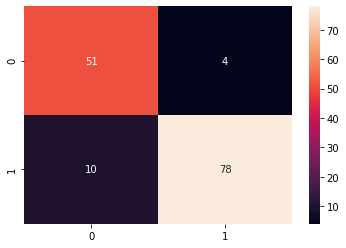

In [50]:
from sklearn.neural_network import BernoulliRBM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone


# Define model. Specify a number for random_state to ensure same results each run
logistic = linear_model.LogisticRegression(solver='newton-cg', tol=1)
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 10
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000

# Fit model
rbm_features_classifier.fit(X_train, y_train)

#check prediction
y_predict3 = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(y_test, y_predict3)))

cm = confusion_matrix(y_test, y_predict3)
sns.heatmap(cm, annot=True)

#accuracy and f1
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_predict3)
f1 = f1_score(y_test, y_predict3, average='macro')
f'The accuracy is %.2f     The f1_score is %.2f' % (acc,f1)

# model 4# 

In [51]:
y_predict=y_predict1+y_predict2+y_predict3

y_predict

array([0, 3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 2, 0, 3, 3, 3, 1, 3, 3, 3, 0, 3,
       3, 3, 2, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 2, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 2,
       0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 1,
       3, 0, 0, 1, 3, 3, 0, 2, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 2, 0, 3, 2,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 2], dtype=uint8)

In [52]:
y_predict=y_predict//2
y_predict


array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

'The accuracy is 0.98     The f1_score is 0.98'

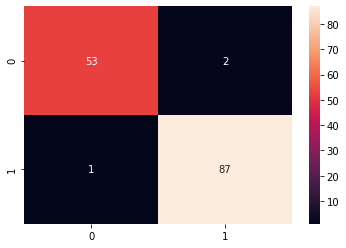

In [53]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

#accuracy and f1
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='macro')
f'The accuracy is %.2f     The f1_score is %.2f' % (acc,f1)

# model 4# 

In [54]:
data2=data.iloc[:,1:]

from scipy.stats import zscore
z0 = data2.apply(zscore)

z = np.abs(zscore(data2))
z_in = (np.abs(zscore(data2)) < 3)
data_clean = data[z_in.all(axis=1)]
x = data_clean.iloc[:,1:]
y = data_clean.iloc[:,0]
d = pd.get_dummies(y)
y = d.drop('M', axis=1)
X_standard = x.apply(zscore)

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.3, random_state=1)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.7, random_state=1)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping
# Early stopping
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=1,
                   verbose=1,
                   mode='auto')

 # create model
    
def baseline_model(units1, units2, dropout):
  model = Sequential()
  model.add(Dense(units1, input_shape=(30,), activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization(axis=1))
  model.add(Dense(units2, activation='relu', activity_regularizer=l2(0.01), kernel_regularizer=l2(0.01)))
  model.add(Dropout(dropout))
  model.add(BatchNormalization(axis=1))
  model.add(Dense(1, activation='sigmoid'))
 
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 
  model.summary()
 
  return model

In [57]:
units1 = 30
units2 = 40
dropout = 0.3
 
# Fit the model
model = baseline_model(units1, units2, dropout)
 
history = model.fit(x_train, y_train, 
                    batch_size=32, 
                    epochs=100, 
                    validation_data=(x_val,y_val), 
                    callbacks=[es])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_6 (Dropout)          (None, 30)                0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 30)                120       
_________________________________________________________________
dense_10 (Dense)             (None, 40)                1240      
_________________________________________________________________
dropout_7 (Dropout)          (None, 40)                0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 40)                160       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

The accuracy is: 0.95
f1 score : 0.97 


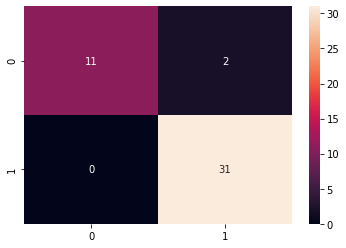

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
y_predict4 = model.predict(x_test)
y_predict4 = np.array([0 if n <= .5 else 1 for n in y_predict4])
cm= confusion_matrix(y_test, y_predict4)

sns.heatmap(cm,annot=True,fmt="d")
acc = accuracy_score(y_test, y_predict4)
print('The accuracy is: %.2f' % acc)
print('f1 score : %.2f '% f1_score(y_test, y_predict4))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


'The accuracy is 0.95     The f1_score is 0.95'

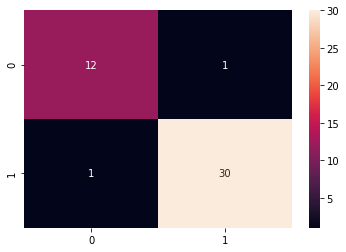

In [60]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

y_train=np.ravel(y_train)

# Define model
svc_model = SVC()

# Fit model
svc_model.fit(x_train, y_train)

#check prediction
y_predict1 = svc_model.predict(x_test)
cm = confusion_matrix(y_test, y_predict1)

sns.heatmap(cm,annot=True,fmt="d")

#accuracy and f1
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_predict1)
f1 = f1_score(y_test, y_predict1, average='macro')
f'The accuracy is %.2f     The f1_score is %.2f' % (acc,f1)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


'The accuracy is 0.93     The f1_score is 0.92'

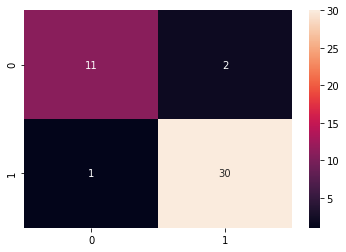

In [65]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

y_train=np.ravel(y_train)

# Define model. Specify a number for random_state to ensure same results each run
neuro_model = MLPClassifier()

# Fit model
neuro_model.fit(x_train, y_train)

#check prediction
y_predict2 = neuro_model.predict(x_test)
cm = confusion_matrix(y_test, y_predict2)

sns.heatmap(cm, annot=True)

#accuracy and f1
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_predict2)
f1 = f1_score(y_test, y_predict2, average='macro')
f'The accuracy is %.2f     The f1_score is %.2f' % (acc,f1)

In [62]:
y_predict=y_predict1+y_predict2+y_predict4

y_predict

array([0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 2, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 1, 0, 3, 3, 0, 3, 3, 3])

In [63]:
y_predict=y_predict//2
y_predict

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1])

'The accuracy is 0.93     The f1_score is 0.92'

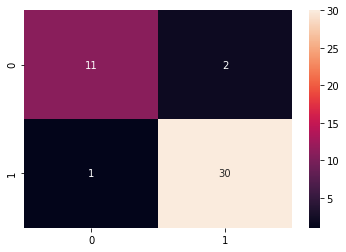

In [64]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

#accuracy and f1
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='macro')
f'The accuracy is %.2f     The f1_score is %.2f' % (acc,f1)